# Importing basic libraries

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [218]:
data=pd.read_csv('insurance.csv')

In [219]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [220]:
data.shape

(1338, 7)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [222]:
#convert columns to catgorical columns
#Not needed 
#data['sex']=pd.Categorical(data['sex'])
#data['region']=pd.Categorical(data['region'])
#data['smoker']=pd.Categorical(data['smoker'])

In [223]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data visualization

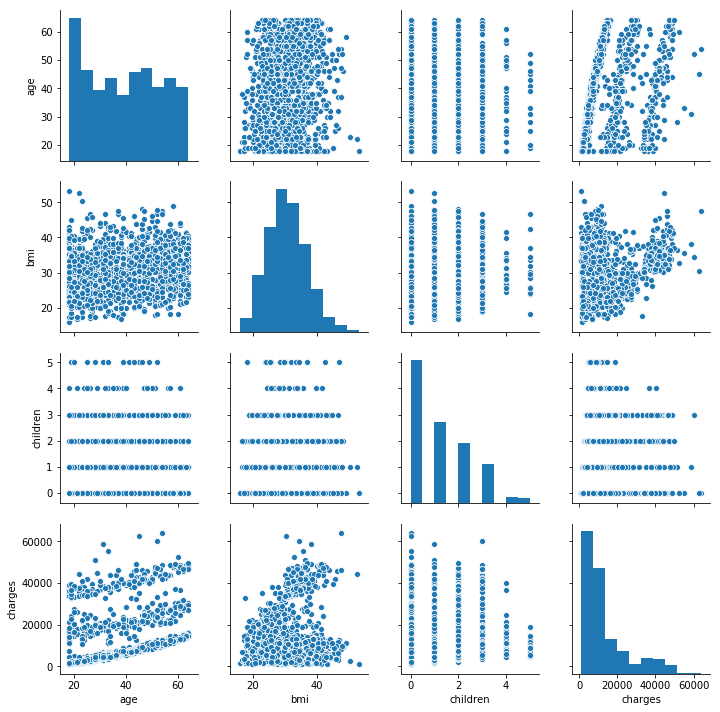

In [224]:
sns.pairplot(data)

In [225]:
#create new column based on healthiness

#data=data.drop(columns='healthy')
data['healthy'] =np.nan

In [226]:
def fun(bmi_str):
    if (bmi_str >=18.5 and bmi_str <= 24.9) :
        return 1
    else:
        return 0

data['healthy']=data['bmi'].apply(fun)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
healthy     1338 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [228]:
#only if its in object format it can be processed using one hot encoding
data['healthy']=data['healthy'].astype(object)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
healthy     1338 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


# Checking normality and correlation

C:\Users\windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


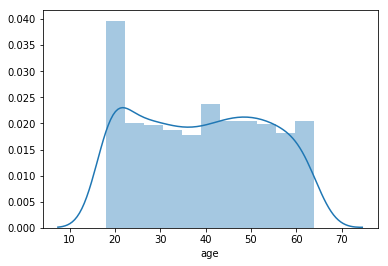

In [230]:
sns.distplot(data['age'])

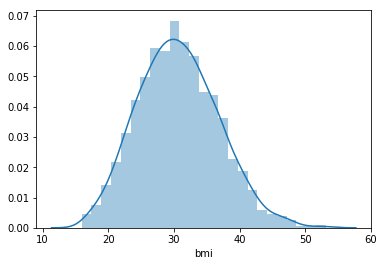

In [231]:
sns.distplot(data['bmi'])

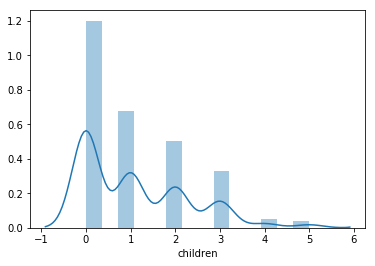

In [232]:
sns.distplot(data['children'])

In [233]:
pd.value_counts(data['smoker'])

no     1064
yes     274
Name: smoker, dtype: int64

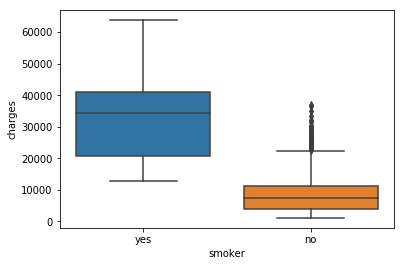

In [234]:
sns.boxplot(y='charges',x='smoker',data=data)

# Explaining ANOVA - not used in the code

7403.0 2.6350136093235692e-130


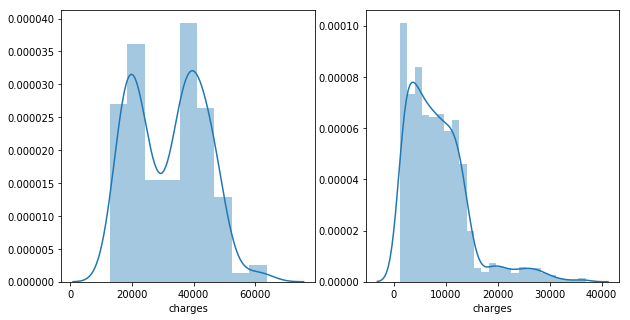

In [235]:
#This tab is not used. Anova is used while comaring 

data_smoker=data[data['smoker']=='yes']
data_no_smoker=data[data['smoker']=='no']
data_smoker=(data_smoker['charges']).astype(int)
data_no_smoker=(data_no_smoker['charges']).astype(int)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data_smoker)
plt.subplot(1,2,2)
sns.distplot(data_no_smoker)

#these are independent columns,
from scipy.stats import mannwhitneyu
z_statistic,p_value=mannwhitneyu(data_no_smoker,data_smoker)
print(z_statistic,p_value)

#Since p<0.05 ,null hyp is rejected. Thus both columns are from different population(Different mean)

In [236]:
pd.value_counts(data['sex'])

male      676
female    662
Name: sex, dtype: int64

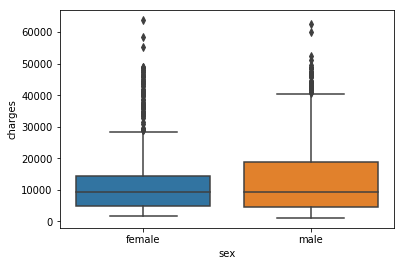

In [237]:
sns.boxplot(y='charges',x='sex',data=data)

221303.5 0.36429895709602056
221303.5 0.36429895709602056


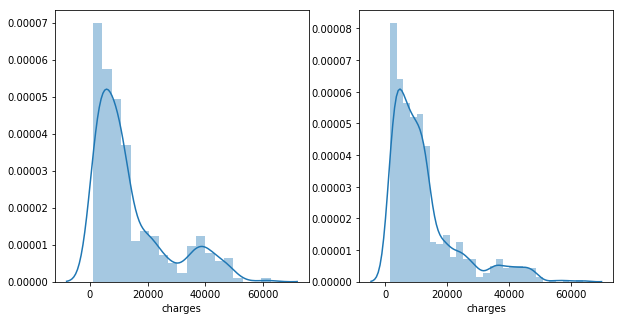

In [238]:
#This tab is not used. Anova is used while comaring 

data_male=data[data['sex']=='male']
data_female=data[data['sex']=='female']
data_male=(data_male['charges']).astype(int)
data_female=(data_female['charges']).astype(int)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data_male)
plt.subplot(1,2,2)
sns.distplot(data_female)

#these are independent columns,
from scipy.stats import mannwhitneyu,ttest_ind
z_statistic,p_value=mannwhitneyu(data_male,data_female)
z_statistic_ttest,p_value_ttest=mannwhitneyu(data_male,data_female)
print(z_statistic,p_value)
print(z_statistic_ttest,p_value_ttest)

#Since p>0.05 ,null hyp is accepted. Thus both columns are from same population(same mean)

In [239]:
pd.value_counts(data['region'])

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

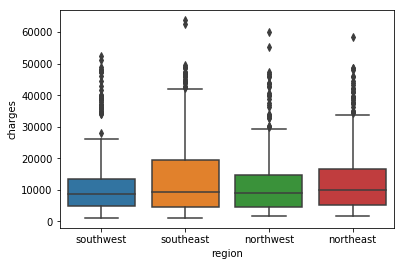

In [240]:
sns.boxplot(y='charges',x='region',data=data)

               df        sum_sq       mean_sq         F    PR(>F)
C(region)     3.0  1.300760e+09  4.335866e+08  2.969627  0.030893
Residual   1334.0  1.947735e+11  1.460071e+08       NaN       NaN
    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
  group1    group2   meandiff    lower      upper   reject
----------------------------------------------------------
northeast northwest -988.8091  -3428.9473  1451.329 False 
northeast southeast 1329.0269  -1044.9543 3703.0081 False 
northeast southwest -1059.4471 -3499.5853  1380.691 False 
northwest southeast 2317.8361   -54.212   4689.8842 False 
northwest southwest  -70.638   -2508.8955 2367.6195 False 
southeast southwest -2388.4741 -4760.5221  -16.426   True 
----------------------------------------------------------
['northeast' 'northwest' 'southeast' 'southwest']


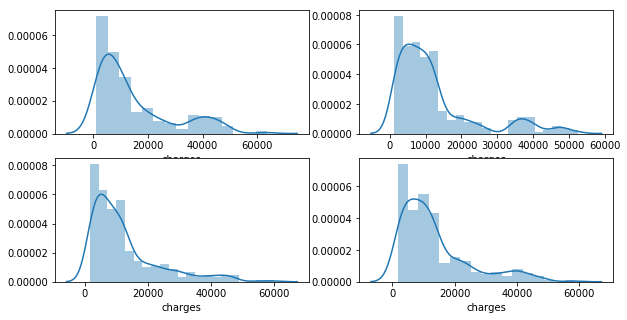

In [241]:
#This tab is not used. Anova is used while comaring 

data_reg1=data[data['region']=='southeast']
data_reg2=data[data['region']=='southwest']
data_reg3=data[data['region']=='northwest']
data_reg4=data[data['region']=='northeast']
data_reg1=(data_reg1['charges']).astype(int)
data_reg2=(data_reg2['charges']).astype(int)
data_reg3=(data_reg3['charges']).astype(int)
data_reg4=(data_reg4['charges']).astype(int)


plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(data_reg1)
plt.subplot(2,2,2)
sns.distplot(data_reg2)
plt.subplot(2,2,3)
sns.distplot(data_reg3)
plt.subplot(2,2,4)
sns.distplot(data_reg4)

#these are independent columns,Following ANOVA - since there are more than 2 categories(columns)
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

formula = 'charges ~ C(region)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)


#Since p<0.05 ,null hyp is rejected. So we must use multi comparison(Refer one way anova- golf exapmle)

mc = MultiComparison(data['charges'], data['region'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

#for all other case except last one - 0 is in between lower and upper bound values. So accept null hyp(mean is equal) 
#for those and reject for last case. 


In [242]:
pd.value_counts(data['healthy'])

0    1116
1     222
Name: healthy, dtype: int64

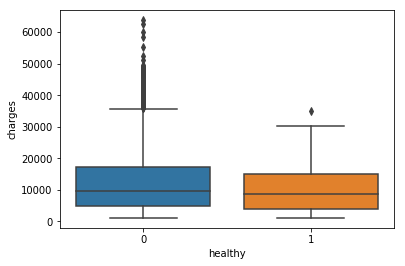

In [243]:
sns.boxplot(y='charges',x='healthy',data=data)

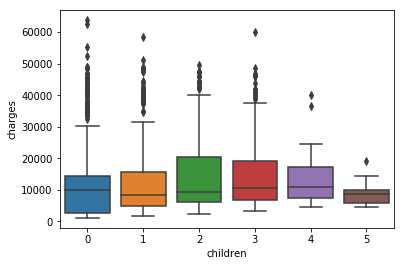

In [244]:
sns.boxplot(y='charges',x='children',data=data)

# Chi Square Testing

In [245]:
#find correlation in case of categorical data

from scipy.stats import chisquare,chi2_contingency

print(chisquare(data["sex"].value_counts()))
print(chisquare(data["smoker"].value_counts()))
print(chisquare(data["region"].value_counts()))
print(chisquare(data["healthy"].value_counts()))

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)
Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)
Power_divergenceResult(statistic=3.4708520179372195, pvalue=0.32456223960286096)
Power_divergenceResult(statistic=597.3363228699552, pvalue=6.355827975006394e-132)


# EDA

In [246]:
# Goodness of Fit Test between 2 categorical variables

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont = pd.crosstab(data["sex"],
                   data["smoker"])

print(cont)
print(chi2_contingency(cont))

#The p-value 0.006 < 0.05 hence we conclude that the 2 categorical variables are dependent

smoker   no  yes
sex             
female  547  115
male    517  159
(7.39291081459996, 0.006548143503580696, 1, array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))


In [247]:
cont = pd.crosstab(data["smoker"],
                   data["region"])

print(cont)
print(chi2_contingency(cont))

#The p-value 0.06 > 0.05 hence we conclude that the 2 categorical variables are independent

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58
(7.34347776140707, 0.06171954839170547, 3, array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))


In [248]:
cont = pd.crosstab(data["smoker"],
                   data["healthy"])

print(cont)
print(chi2_contingency(cont))

#The p-value 0.46 > 0.05 hence we conclude that the 2 categorical variables are independent

healthy    0    1
smoker           
no       892  172
yes      224   50
(0.5407751029666422, 0.4621116760826519, 1, array([[887.46188341, 176.53811659],
       [228.53811659,  45.46188341]]))


In [249]:
cont = pd.crosstab(data["sex"],
                   data["healthy"])

print(cont)
print(chi2_contingency(cont))

#The p-value 0.40 > 0.05 hence we conclude that the 2 categorical variables are independent

healthy    0    1
sex              
female   546  116
male     570  106
(0.6924677202598921, 0.4053262837923183, 1, array([[552.16143498, 109.83856502],
       [563.83856502, 112.16143498]]))


In [250]:
correlation=data.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [251]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
healthy     1338 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


In [252]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
# Like feature scaling

#Replace 1 and 0 with values in healthy column
data['healthy'] = data['healthy'].replace({0:'not_healthy', 1:'healthy'})

In [253]:
#one hot coding
data=pd.get_dummies(data,columns=['sex','smoker','region','healthy'],drop_first='True')

In [254]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,healthy_not_healthy
0,19,27.900,0,16884.92400,0,1,0,0,1,1
1,18,33.770,1,1725.55230,1,0,0,1,0,1
2,28,33.000,3,4449.46200,1,0,0,1,0,1
3,33,22.705,0,21984.47061,1,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1


# Data preprocessing

In [255]:
#PREPROCESSING DATA - Standardization and training data split

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop(columns='charges')
y=data['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

# Create the Scaler object
scaler = preprocessing.StandardScaler()

#feature scaling in dependent and independent columns
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

        #Gets some error
#y_train=scaler.fit_transform(y_train)
#y_test=scaler.transform(y_test)

linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

linear_reg.score(X_test,y_test)

C:\Users\windows\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\windows\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\windows\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


0.7422742541150666

# Linear Regression - 2 types

In [256]:
#Using SKLEARN  - Without Standardized

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop(columns='charges')
y=data['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

linear_reg.score(X_test,y_test)

0.7422742541150666

In [257]:
#Using OLS method

from statsmodels.formula.api import ols   

formula='charges ~ healthy_not_healthy +  smoker_yes + sex_male + children + age + bmi'
model=ols(formula,data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:33:56   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.197e+04    963.534    -12.428      0.000   -1.39e+04   -1.01e+04
healthy_not_healthy   283.7617    553.614      0.513      0.608    -802.290    1369.814
smoker_yes           2.383e+04    412.824     57.724      0.000     2.3e+04    2.46e+04
sex_male             -128.6017    333.453     -0.386      0.700    -782.752     525.549
children              475.8246    137.922      3.450      0.001     205.257     746.392
age                   257.6320     11.909     21.634      0.000     234.270     280.994
bmi                   312.1486     33.903      9.207      0.000     245.639     378.658
==============================================================================
Omnibus:                      302.319   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.501
Skew:                           1.219   Prob(JB):                    7.83e-158
Kurtosis:                       5.652   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [258]:
#Polynomial regression


from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X1=data.drop(columns='charges')
y1=data['charges']

X_poly_train,X_poly_test,y_poly_train,y_poly_test=train_test_split(X1,y1,test_size=0.25,random_state=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)

X1_poly_train=poly.fit_transform(X_poly_train)
X1_poly_test=poly.fit_transform(X_poly_test)

lin=linear_model.LinearRegression()
lin.fit(X1_poly_train,y_poly_train)

y_pred=lin.predict(X1_poly_test)

lin.score(X1_poly_test,y_poly_test)

0.8336268343660543

Thus by using this we get higher value.